In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [95]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [96]:
galaxy_j5 = df_events.loc[(df_events["model"] == "Samsung Galaxy J5") & (df_events["event"] == "conversion"),:]
galaxy_j5 = galaxy_j5[["city","region","country","event","timestamp","condition","storage"]]
galaxy_j5.head()

,city,region,country,event,timestamp,condition,storage
6985,NaN,NaN,NaN,conversion,2018-02-09 22:07:07,Bom,16GB
18502,NaN,NaN,NaN,conversion,2018-01-10 18:59:05,Muito Bom,16GB
20959,NaN,NaN,NaN,conversion,2018-04-21 18:54:14,Excelente,16GB
37398,NaN,NaN,NaN,conversion,2018-04-29 13:18:15,Bom,16GB
50967,NaN,NaN,NaN,conversion,2018-03-13 12:24:21,Muito Bom,16GB


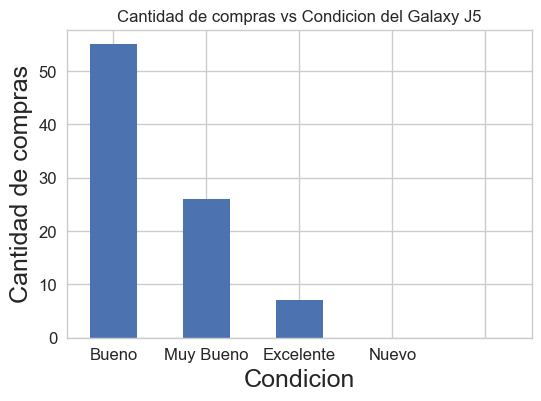

In [97]:
condition = galaxy_j5["condition"].value_counts()

ax = condition.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del Galaxy J5",figsize =(6,4),legend = False, fontsize = 12)
ax.set_xlabel("Condicion", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["Bueno","Muy Bueno","Excelente","Nuevo"],rotation = "horizontal")
plt.show()

In [98]:
#fechas

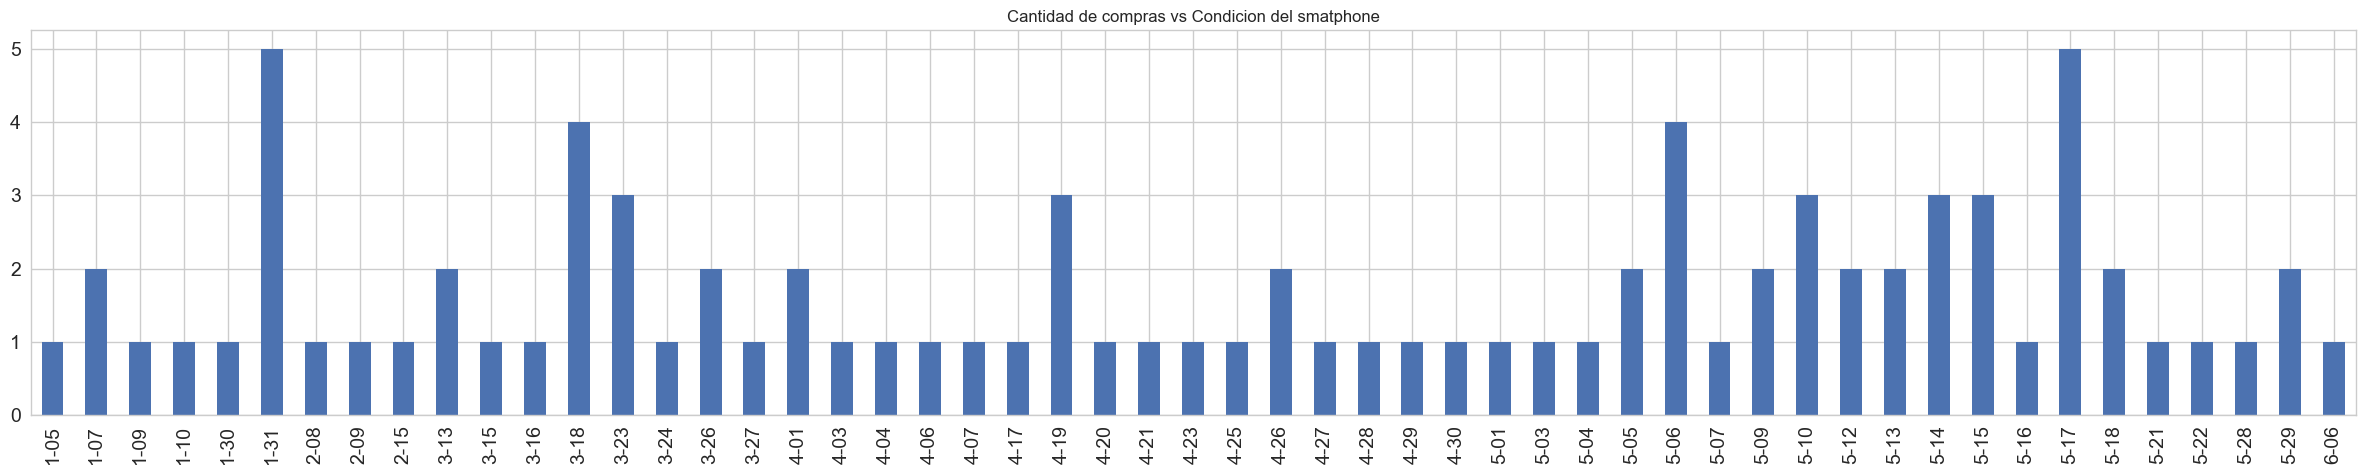

In [99]:
galaxy_j5['dia_mes'] = galaxy_j5['timestamp'].apply(lambda x: x.split(' ')[0][-5:])
#galaxy_j5.sort_values(by = galaxy)
fechas = galaxy_j5['dia_mes'].value_counts()
#fechas  = fechas.to_frame(name = "Fechas").reset_index()
fechas
#fechas.columns= [["Fecha","Frecuencia"]]
#fechas.sort_values(fechas["Fecha"])
fechas
#fechas.sort(fechas.index)

fechas = galaxy_j5.sort_values(by = "timestamp",ascending = True)["timestamp"]
meses=pd.to_datetime(fechas).dt.month
dias=pd.to_datetime(fechas).dt.day
serie_final= meses.map(lambda x: str(x))+'-'+dias.map(lambda x: str(x) if x>9 else "0"+str(x))
serie_final_ti = serie_final.value_counts().sort_index()



#galaxy_j5["mes"] = pd.to_datetime(galaxy_j5["timestamp"]).dt.month
#galaxy_j5["dia"] = pd.to_datetime(galaxy_j5["timestamp"]).dt.day
#galaxy_j5
ax = serie_final_ti.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(30,5),legend = False, fontsize = 14)

#plt.rc('figure', dpi=350)
#g=sns.barplot(x=serie_final.index,y=serie_final.values)
#g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.show()


In [100]:
#serie_final

In [115]:
serie_final_t = serie_final_ti.to_dict()
serie_final_t
fin = False
for i in range (1,7):
    if fin:
        break
    for j in range (1,32):
        if j <10:
            fecha = str(i)+'-0'+str(j)
        else:
            fecha = str(i)+'-'+str(j)
        
        if i == 2 and j >= 29:
            break
        if i in [4,6] and j == 31:
            break
        if i == 6 and j >= 10:
            fin = True
            break
        if not fecha in serie_final_t:
            serie_final_t[fecha] = 0

serie_final_t = pd.Series(serie_final_t)
len(serie_final_t.tolist())

160

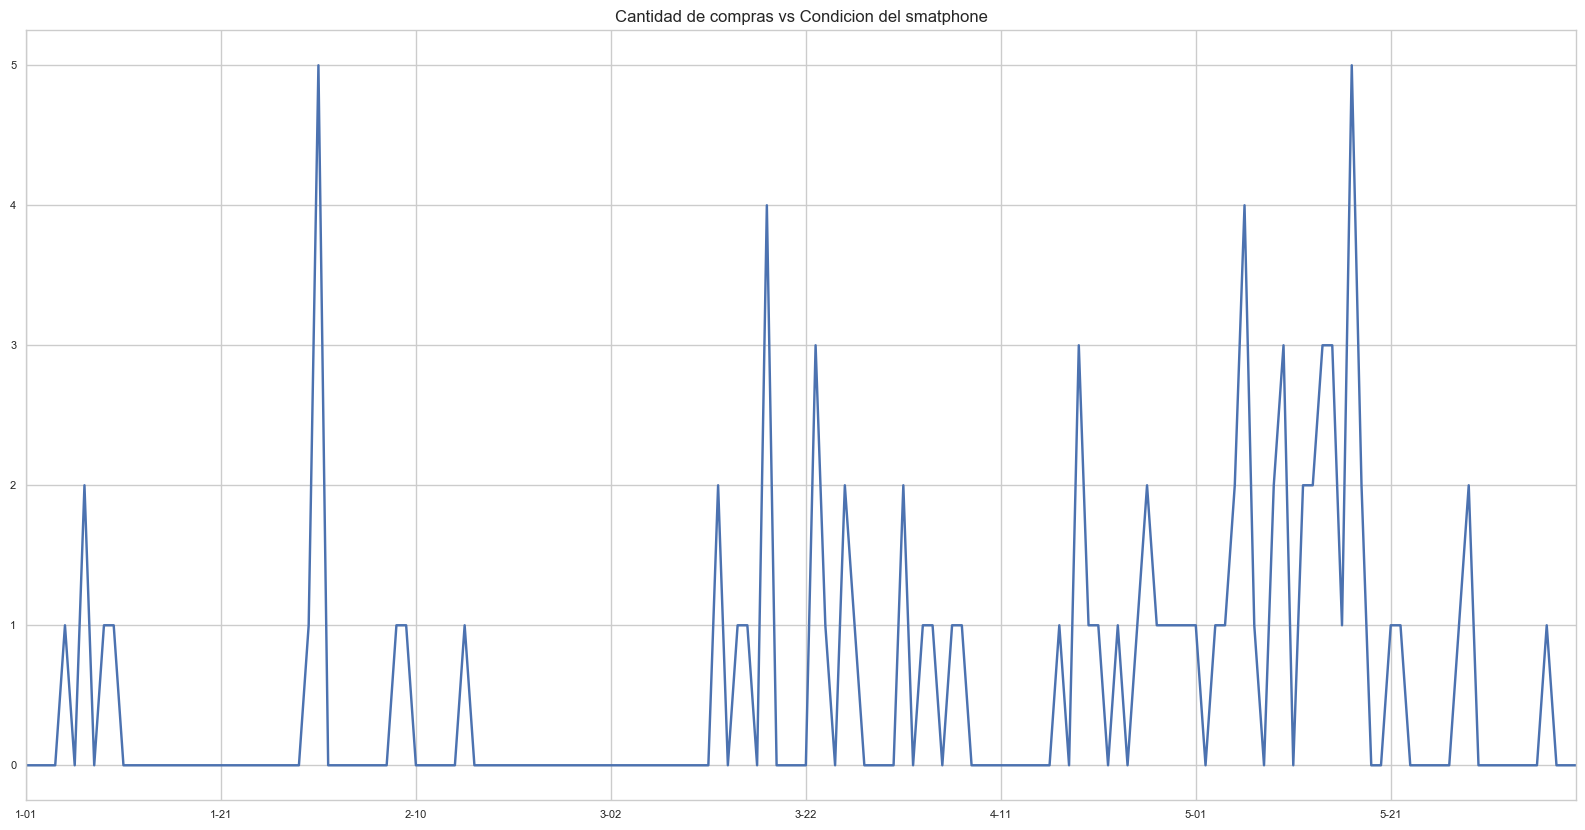

In [102]:
ax = serie_final_t.plot(kind = 'line', title = "Cantidad de compras vs Condicion del smatphone",figsize =(20,10),legend = False, fontsize = 8)
lista = serie_final_t.index.tolist()

plt.show()

In [103]:
galaxy_j5["storage"].value_counts()

16GB     87
8GB       1
64GB      0
512MB     0
4GB       0
32GB      0
256GB     0
128GB     0
Name: storage, dtype: int64

In [104]:
muy_buenos = galaxy_j5.loc[galaxy_j5["condition"]== "Muito Bom"]["dia_mes"].value_counts()
#ax = serie_final.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(30,5),legend = False, fontsize = 14)

#plt.rc('figure', dpi=350)
#g=sns.barplot(x=serie_final.index,y=serie_final.values)
#g.set_xticklabels(g.get_xticklabels(), rotation = 90)
#plt.show()

muy_buenos

03-18    4
04-01    2
05-06    2
05-04    1
03-13    1
01-10    1
04-23    1
04-20    1
05-28    1
03-26    1
04-07    1
04-28    1
01-05    1
05-29    1
05-12    1
05-13    1
06-06    1
05-01    1
04-17    1
05-14    1
04-26    1
Name: dia_mes, dtype: int64

In [113]:
muy_buenos_d= muy_buenos.to_dict()
muy_buenos_d
fin = False
for i in range (1,7):
    if fin:
        break
    for j in range (1,32):
        if j <10:
            fecha_t = '0'+str(i)+'-0'+str(j)
        else:
            fecha_t = '0'+str(i)+'-'+str(j)
        
        if i == 2 and j >= 29:
            break
        if i in [4,6] and j == 31:
            break
        if i == 6 and j >= 10:
            fin = True
            break
        if not fecha_t in muy_buenos_d:
             muy_buenos_d[fecha_t] = 0

muy_buenos_d = pd.Series(muy_buenos_d)
len(muy_buenos_d.tolist())

160

In [124]:
buenos = galaxy_j5.loc[galaxy_j5["condition"]== "Bom"]["dia_mes"].value_counts()
#ax = serie_final.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(30,5),legend = False, fontsize = 14)

#plt.rc('figure', dpi=350)
#g=sns.barplot(x=serie_final.index,y=serie_final.values)
#g.set_xticklabels(g.get_xticklabels(), rotation = 90)
#plt.show()

buenos

01-31    5
05-17    5
03-23    3
04-19    3
05-10    3
05-06    2
05-05    2
05-14    2
05-15    2
05-09    2
05-18    2
03-24    1
03-26    1
02-08    1
02-09    1
03-15    1
03-16    1
05-13    1
05-16    1
05-12    1
01-30    1
04-26    1
04-27    1
04-25    1
04-30    1
05-21    1
05-22    1
04-29    1
01-09    1
05-29    1
05-07    1
04-06    1
05-03    1
01-07    1
02-15    1
Name: dia_mes, dtype: int64

In [129]:
buenos_d= buenos.to_dict()

fin = False
for i in range (1,7):
    if fin:
        break
    for j in range (1,32):
        if j <10:
            fecha_t = '0'+str(i)+'-0'+str(j)
        else:
            fecha_t = '0'+str(i)+'-'+str(j)
        
        
        if i == 2 and j >= 29:
            break
        if i in [4,6] and j == 31:
            break
        if i == 6 and j >= 10:
            fin = True
            break
        if not fecha_t in buenos_d:
             buenos_d[fecha_t] = 0

buenos_d = pd.Series(buenos_d)

buenos_d

01-01    0
01-02    0
01-03    0
01-04    0
01-05    0
01-06    0
01-07    1
01-08    0
01-09    1
01-10    0
01-11    0
01-12    0
01-13    0
01-14    0
01-15    0
01-16    0
01-17    0
01-18    0
01-19    0
01-20    0
01-21    0
01-22    0
01-23    0
01-24    0
01-25    0
01-26    0
01-27    0
01-28    0
01-29    0
01-30    1
        ..
05-11    0
05-12    1
05-13    1
05-14    2
05-15    2
05-16    1
05-17    5
05-18    2
05-19    0
05-20    0
05-21    1
05-22    1
05-23    0
05-24    0
05-25    0
05-26    0
05-27    0
05-28    0
05-29    1
05-30    0
05-31    0
06-01    0
06-02    0
06-03    0
06-04    0
06-05    0
06-06    0
06-07    0
06-08    0
06-09    0
Length: 160, dtype: int64

In [131]:
exc = galaxy_j5.loc[galaxy_j5["condition"]== "Excelente"]["dia_mes"].value_counts()
#ax = serie_final.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(30,5),legend = False, fontsize = 14)

#plt.rc('figure', dpi=350)
#g=sns.barplot(x=serie_final.index,y=serie_final.values)
#g.set_xticklabels(g.get_xticklabels(), rotation = 90)
#plt.show()

exc

04-03    1
01-07    1
03-27    1
04-21    1
05-15    1
04-04    1
03-13    1
Name: dia_mes, dtype: int64

In [135]:
exc_d= exc.to_dict()

fin = False
for i in range (1,7):
    if fin:
        break
    for j in range (1,32):
        if j <10:
            fecha_t = '0'+str(i)+'-0'+str(j)
        else:
            fecha_t = '0'+str(i)+'-'+str(j)
        
        
        if i == 2 and j >= 29:
            break
        if i in [4,6] and j == 31:
            break
        if i == 6 and j >= 10:
            fin = True
            break
        if not fecha_t in exc_d:
             exc_d[fecha_t] = 0

exc_d = pd.Series(exc_d)

exc_d.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]